In [100]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [101]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [7 3 9 3 8 2 2 7 2 5]


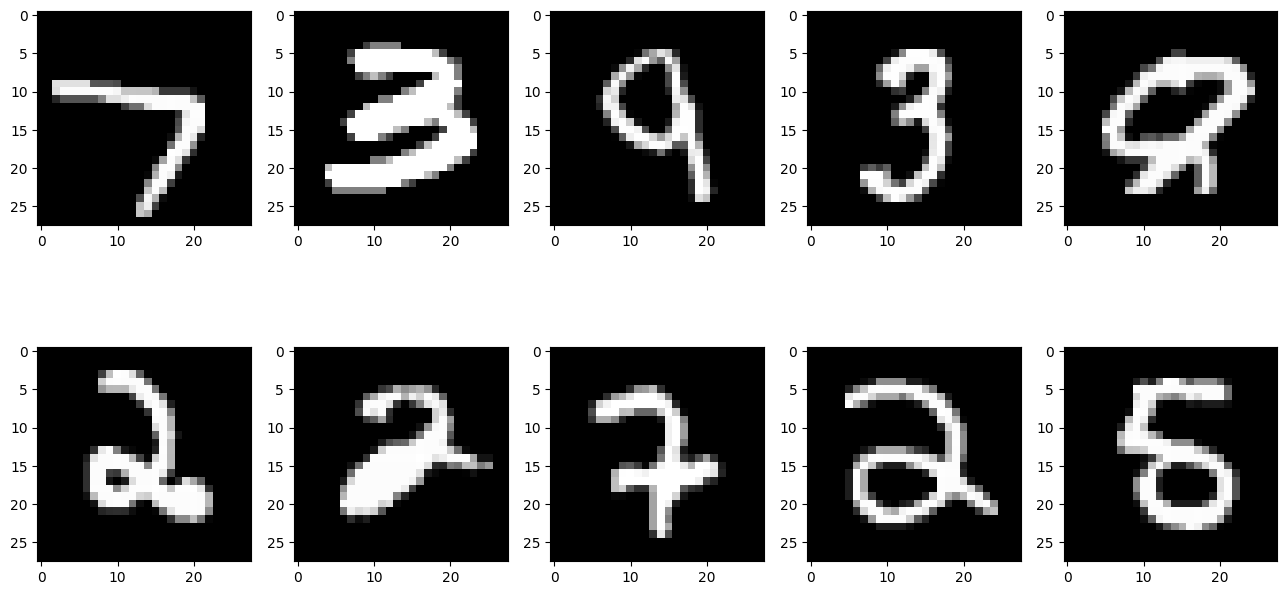

In [102]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))

random_numbers = np.random.randint(0, 60000, 10)

print('Target labels: ',train_target[random_numbers])

for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray') #show gary scale image
plt.show()

In [103]:
random_numbers.shape
print(random_numbers)

[36139 13577   264 54739 33388 37418 33274 35696 37532 31266]


Pre-processing stage

In [104]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [105]:
#Gradient Descent
#Stochastic Gradient Descent

In [108]:
model=Sequential()

#input layer
model.add(Flatten(input_shape=(28,28)))

#hidden layers
model.add(Dense(64,activation='relu',kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))) 
model.add(Dense(64,input_dim=64,activation='relu',kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))) #equals one times ten to the power of minus four
model.add(Dense(32,input_dim=64,activation='relu',kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))

#output layer
model.add(Dense(10,input_dim=32,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_20 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [93]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10) #History object

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9135 - loss: 0.3322
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9627 - loss: 0.1745
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9714 - loss: 0.1476
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9751 - loss: 0.1354
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9779 - loss: 0.1263
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9797 - loss: 0.1209
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9819 - loss: 0.1141
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9826 - loss: 0.1123
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9837 - loss: 0.1089
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9844 - loss: 0.1065


Plot the loss and accuracy graphs

In [94]:
print(train_info.history)

{'accuracy': [0.9134666919708252, 0.9626500010490417, 0.9713833332061768, 0.9751499891281128, 0.9779333472251892, 0.9796666502952576, 0.9819166660308838, 0.9825833439826965, 0.9837499856948853, 0.9843500256538391], 'loss': [0.3321969211101532, 0.17452912032604218, 0.14755389094352722, 0.13540036976337433, 0.12631754577159882, 0.1208588108420372, 0.11412964016199112, 0.11231078207492828, 0.10887232422828674, 0.10651060938835144]}


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


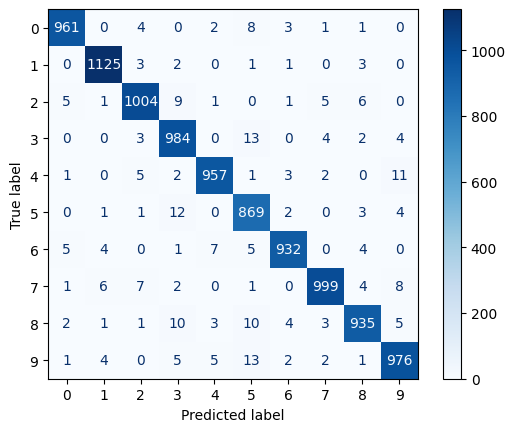

In [95]:
#L1 → makes weights exactly zero (feature selection)
#L2 → makes weights small but keeps all features (better generalization)
# Predictions and confusion matrix
y_pred = np.argmax(model.predict(new_test_data), axis=1)        # Predict on normalized test data
y_true = np.argmax(new_test_target, axis=1)                     # Convert one-hot targets back to class indices

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

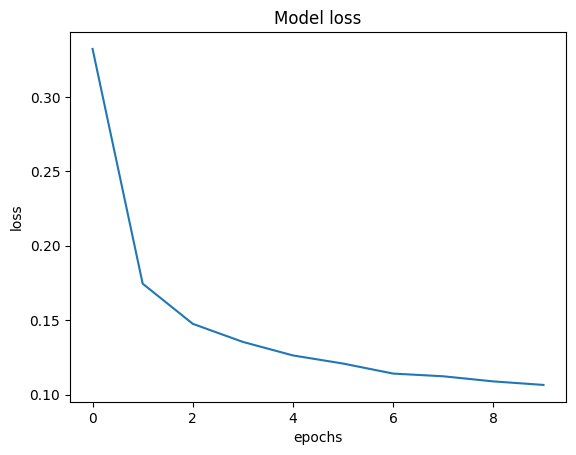

In [96]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

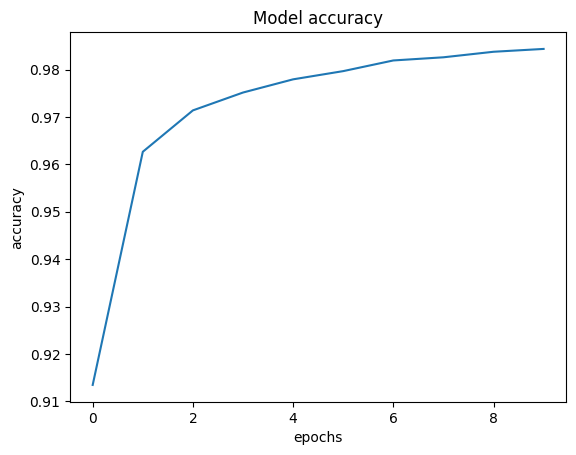

In [97]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [98]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.1462
Loss of the Test dataset is: 0.14621667563915253
Accuracy of the test dataset is: 0.9742000102996826


Save the model weights

In [99]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

In [110]:
# # Import necessary libraries
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.regularizers import l1_l2
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Load MNIST dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Normalize data
# x_train = x_train.astype('float32') / 255
# x_test = x_test.astype('float32') / 255

# # One-hot encode labels
# y_train_cat = to_categorical(y_train, 10)
# y_test_cat = to_categorical(y_test, 10)

# # Build the MLP model with L1 & L2 regularization
# model = Sequential([
#     Flatten(input_shape=(28,28)),
#     Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
#     Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
#     Dense(10, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model with increased epochs and batch size for better performance
# history = model.fit(x_train, y_train_cat, epochs=5, validation_split=0.1)

# # Evaluate the model
# test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
# print(f"Test Accuracy: {test_acc:.4f}")

# # Predictions and confusion matrix
# y_pred = np.argmax(model.predict(x_test), axis=1)
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap=plt.cm.Blues)
# plt.show()
